## 实验：LAB 色彩空间直方图均衡

### 实验概要

`LAB` 的全称是 CIELAB，有时候也写成 `CIE L*a*b*`- 这里的 CIE 代表 International Commission on Illumination（国际照明委员会），它是一个关于光照、颜色等的国际权威组织。

对于 LAB 色彩空间中的图像 ——

- 第一个平面为 `L*` ：代表感知的亮度
- 第二个平面为 `A*` ：代表从绿色（负值）到红色（正值）的分量
- 第三个平面为 `B*` ：代表从蓝色（负值）到黄色（正值）的分量

LAB 是基于人对颜色的感觉来设计的，是感知均匀（Perceptual Uniform）的，指的是：如果数字（即前面提到的 L、A、B 这三个数）变化的幅度一样，那么它给人带来视觉上的变化幅度也差不多。可以使用已经建立的 L* A* B* 色彩模型，来充当与参照设备无关的模型 —— 同样的颜色在不同的设备上显示的颜色一致。

同时，要认识到永远不能精确的在视觉上表示这个模型中颜色的完全色域是至关重要的 —— 它们只是用来帮助理解概念而天生就不精确的。因为 L*a*b* 模型是三维模型，它只能在三维空间中完全表现出来。大致可以通过下图进行参考：

![](./img/26.png)

幸运的是，我们只需要针对 LAB 色彩空间的 `L` 平面进行直方图均衡化，也就是调整图像的感知亮度。因此，与 HSV 的明度 V 通道一样，对其进行因此直方图均衡化，不会对图像像素的色度造成任何的影响。

要从 BGR 转到 LAB，请使用以下命令：

```python
cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
```

### 实验目标

本实验的目的是在将提供给您的图像转换为 LAB 颜色空间后，增强其对比度。

在 LAB 空间中的处理直方图均衡化，标准的操作步骤如下：

1. 将图像从 RGB/BGR 转换为 LAB 颜色空间。
2. 将图像分为 L，A 和 B 平面。
3. 均衡 L 平面的直方图。
4. 将 L，A 和 B 平面合并回去。
5. 转换回 RGB/BGR。

之后，您将能够比较 RGB，HSV 和 LAB 颜色空间中彩色图像的直方图均衡化结果。

注意：在本实验中，请参照之前的实验，使用更为直接的代码实现直方图均衡，然后再使用 CLAHE。

同时，**均避免使用 `cv2.split()` / `cv2.merge()`命令**

### 1. 导入依赖库

In [1]:
import cv2                         # 导入OpenCV
import matplotlib.pyplot as plt    # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 加载图片

确认读取图片的文件名和路径与之前的实验一样，确保采用的是相同的图片进行增强。

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab3/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

img = cv2.imread('./data/bloom.jpg')   # 读取图片

我们将使用 Matplotlib 显示图像。 Matplotlib 拍摄 RGB 格式的图像。因此，要使用它，我们将首先将 BGR 图像转换为 RGB。

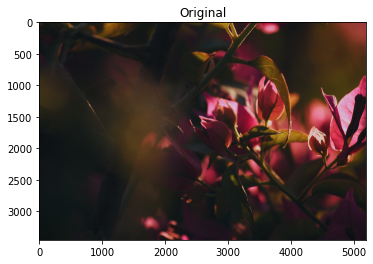

In [3]:
# 将图像转换为RGB模式
origrgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB);  
# 指定显示转换后的图像
imgplot = plt.imshow(origrgb)                   
# 指定图像标题
plt.title('Original')                           
# 显示图像
plt.show()                                      

### 3. 将图像色彩空间转换为 LAB

使用以下代码将图像转换为 LAB 空间

In [4]:
# 将图像转换为LAB模式
imgLAB = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);   

### 4. 直接执行直方图均衡化

在 `L` 通道（LAB 图像的平面 `0` ）上执行直方图均衡化。

In [5]:
# 在L通道上执行直方图均衡化
imgLAB[:,:,0]= cv2.equalizeHist(imgLAB[:,:,0]) 

### 5. 使用 Matplotlib 显示图像

In [6]:
# 将图像转换为RGB模式 
rgb = cv2.cvtColor(imgLAB,cv2.COLOR_LAB2RGB);  

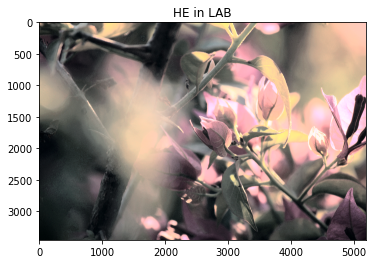

In [7]:
# 指定显示转换后的图像
plt.imshow(rgb)                   
# 指定图像标题
plt.title('HE in LAB')            
# 显示图像
plt.show()                        

### 6. 直接执行 CLAHE

要使用 CLAHE 重复该过程，请创建一个 CLAHE 对象：

In [8]:
# 创建一个阈值为4，区快尺寸为16x16的CLAHE对象
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))  

In [9]:
# 由于imgLAB在上面的代码中被修改，这里重新导入img图片，
# 转换为LAB格式，定义新的imgLAB
imgLAB = cv2.cvtColor(img,cv2.COLOR_BGR2LAB); 
# 将CLAHE应用于L通道（刚刚创建的imgLAB图像的平面0）
imgLAB[:,:,0] = clahe.apply(imgLAB[:,:,0])    

### 7. 使用 Matplotlib 显示 CLASH 图像

In [10]:
# 将图像转换为RGB模式 
rgb = cv2.cvtColor(imgLAB,cv2.COLOR_LAB2RGB);      

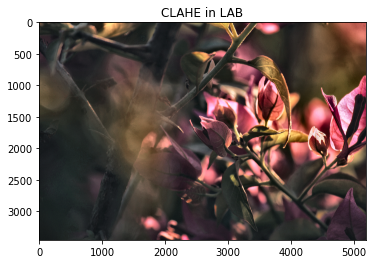

In [11]:
plt.imshow(rgb)                      # 指定显示转换后的图像
plt.title('CLAHE in LAB')            # 指定图像标题
plt.show()                           # 显示图像

### 实验小结

在本实验中，我们逐步了解了如何在 LAB 色彩空间中增强图像的对比度。

现在，您已经了解了如何将直方图均衡和 CLAHE 应用于 `RGB`，`HSV` 和 `LAB` 色彩空间当中。

在这里我们稍微总结一下包括前面几个实验在内的对原图的增强效果，原图如下：

<img src="./img/28.jfif" width="60%">

下表总结了 `RGB`，`HSV` 和 `LAB` 颜色空间中的直方图均衡和 CLAHE 输出：

![](./img/27.jfif)

从该表可以看出，对于彩色图像，CLAHE 在图像清晰度方面始终胜过简单的直方图均衡化。

此外，所有这些颜色空间中的简单直方图均衡化都引入了使对比度失真的伪影。 

为了获得最佳结果，建议将 `HSV` 或 `LAB` 颜色空间用于彩色图像的直方图均衡化。